## Проект: датасет titanic. Поиск выживших

In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [5]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# Все пропущенные значения дополним нулем
df.Age = df.Age.fillna(0)

In [34]:
# Убираем неинформотивные фичи
X = df.drop({'PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'}, axis = 1)
y = df.Survived

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [45]:
# Переводим все на torch
X_train = torch.from_numpy(X_train.to_numpy())
y_train = torch.from_numpy(y_train.to_numpy())
X_test = torch.from_numpy(X_test.to_numpy())
y_test = torch.from_numpy(y_test.to_numpy())

In [259]:
# Создаем класс Dataset
class MyDataset(Dataset):
    def __init__(self, datamatrix, labels):
        self.datamatrix = datamatrix
        self.datamatrix = datamatrix/datamatrix.max(0).values
        self.labels = labels
    
    def __getitem__(self, idx): # обязательный
        return self.datamatrix[idx].float(), self.labels[idx]
    
    def __len__(self):
        return self.datamatrix.shape[0]
    

In [252]:
X_train

tensor([[ 3.0000, 47.0000,  0.0000,  0.0000,  9.0000],
        [ 3.0000,  0.0000,  0.0000,  0.0000,  7.7500],
        [ 2.0000, 34.0000,  1.0000,  0.0000, 26.0000],
        ...,
        [ 3.0000, 19.0000,  0.0000,  0.0000,  6.7500],
        [ 3.0000,  0.0000,  1.0000,  0.0000, 15.5000],
        [ 3.0000, 21.0000,  0.0000,  0.0000,  7.8542]], dtype=torch.float64)

In [260]:
md_train = MyDataset(X_train, y_train)
md_test = MyDataset(X_test, y_test)

In [203]:
# Определяем размер батча
batch_size = 32

In [261]:
# Заранее предобрабатываем данные
train_dataloader = DataLoader(md_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(md_test, batch_size=batch_size, shuffle=True)

In [205]:
for a, b in test_dataloader:
    break

In [206]:
a.shape, b.shape

(torch.Size([32, 5]), torch.Size([32]))

In [262]:
# Создаем класс Model
class Model(torch.nn.Module):
    def __init__(self, n_hid):
        super().__init__()
        self.fc1 = torch.nn.Linear(5, n_hid)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hid, n_hid)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hid, 1)    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

In [263]:
# Попробуем 100 нейронов в скрытых слоях
# в качестве оптимайзера используем Adam и скорость обучение возбмем равной 0.001
# loss - BCEWithLogitsLoss
net = Model(100)
optimizer = torch.optim.Adam(net.parameters(), lr= 0.001)
loss_func = torch.nn.BCEWithLogitsLoss()

In [264]:
# net, optimizer, loss_func, train_dataloader

In [265]:
# Попробуем на 20 эпохах
for epoch in range(20):
    for x_batch, y_batch in train_dataloader:
        y_pred = net.forward(x_batch)
        loss = loss_func(y_pred.squeeze(), y_batch.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print('Loss: ', loss.item())

Loss:  0.7472370862960815
Loss:  0.7291766405105591
Loss:  0.7121816277503967
Loss:  0.6950320601463318
Loss:  0.6917250156402588
Loss:  0.6876280307769775
Loss:  0.6778491139411926
Loss:  0.673558235168457
Loss:  0.6852138042449951
Loss:  0.6977835297584534
Loss:  0.692570686340332
Loss:  0.6307507753372192
Loss:  0.651593804359436
Loss:  0.6256078481674194
Loss:  0.6067615747451782
Loss:  0.641115665435791
Loss:  0.6884005665779114
Loss:  0.7283017635345459
Loss:  0.6930909752845764
Loss:  0.6373348832130432
Loss:  0.670659601688385
Loss:  0.6707863807678223
Loss:  0.5752269625663757
Loss:  0.5981974005699158
Loss:  0.7004155516624451
Loss:  0.6845209002494812
Loss:  0.6332600712776184
Loss:  0.6217753887176514
Loss:  0.5994395613670349
Loss:  0.6523075103759766
Loss:  0.6305676102638245
Loss:  0.6849724054336548
Loss:  0.5542402863502502
Loss:  0.5857157111167908
Loss:  0.5772216320037842
Loss:  0.612677812576294
Loss:  0.6544365882873535
Loss:  0.5467052459716797
Loss:  0.820866465

In [223]:
loss.item()

0.7497831583023071

In [147]:
def predict(net, x_val, y_val):
    y_predict = net.forward(x_val.float())
    plt.plot(x_val.numpy(), y_val.numpy(), 'o', c = 'g', label = 'то что должно быть')
    plt.plot(x_val.numpy(), y_predict.data.numpy(), 'o', c = 'r', label = 'predict of network')
#    plt.legend(loc = 'upper left')

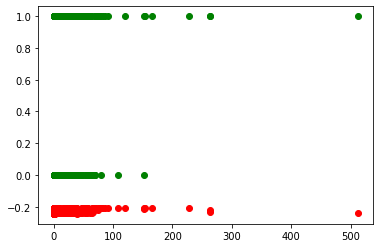

In [148]:
predict(our_net, X_test, y_test)

In [149]:
X_test.float().dtype
X_train.float()

tensor([[ 3.0000, 47.0000,  0.0000,  0.0000,  9.0000],
        [ 3.0000,  0.0000,  0.0000,  0.0000,  7.7500],
        [ 2.0000, 34.0000,  1.0000,  0.0000, 26.0000],
        ...,
        [ 3.0000, 19.0000,  0.0000,  0.0000,  6.7500],
        [ 3.0000,  0.0000,  1.0000,  0.0000, 15.5000],
        [ 3.0000, 21.0000,  0.0000,  0.0000,  7.8542]])

In [150]:
X_train.float().dtype

torch.float32

In [152]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

In [155]:
# Попробуем теперь на 1000 эпохах
for epoch in range(1000):
    optimizer.zero_grad()
    X_train[]
    y_val = our_net.forward(X_train.float())
    y_val.squeeze_()
    loss_val = loss_func(y_val, y_train.float())
    loss_val.backward()
    optimizer.step()

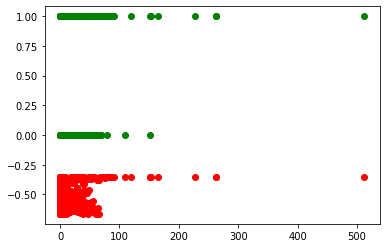

In [156]:
predict(our_net, X_test, y_test)